In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [26]:
df = pd.read_csv(r'data_center\data.csv')
df.info()
df.head().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


On observe sur diagnosis M pour Métastase et B pour Bénin

In [27]:
df_categorical = df['diagnosis'].astype(str)

unique_counts = df_categorical.nunique()
unique_values = df_categorical.unique()

pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
0,2,M
1,2,B


In [28]:
dfclean = df.drop(['Unnamed: 32', 'id'], axis=1)

In [ ]:
print(dfclean.isnull().sum())

In [30]:

le = LabelEncoder()
dfclean['diagnosis'] = le.fit_transform(dfclean['diagnosis'])

En codage de diagnosis

In [62]:
dfclean.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900


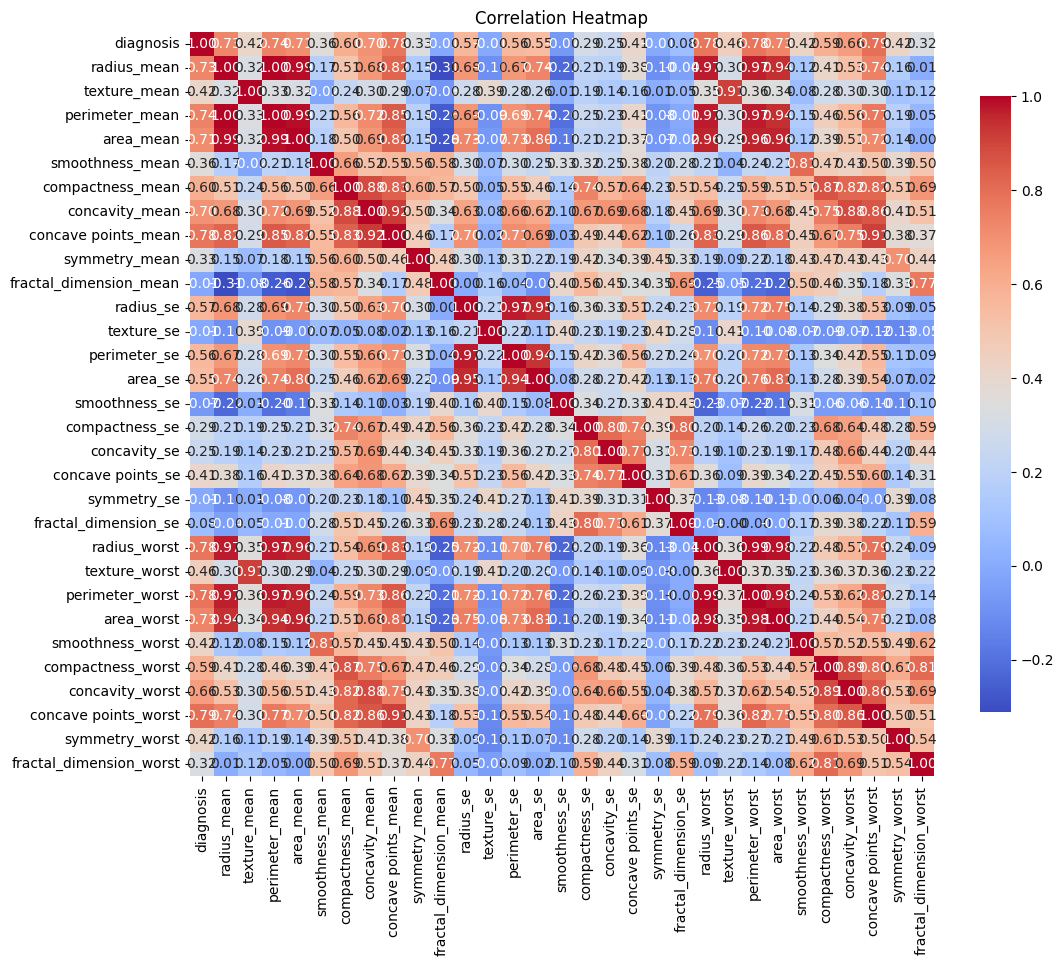

In [99]:
dfclean_heatmap = dfclean.corr()
plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap')
sns.heatmap(dfclean_heatmap, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()  

Beacoup de correaltion sur diagnosis

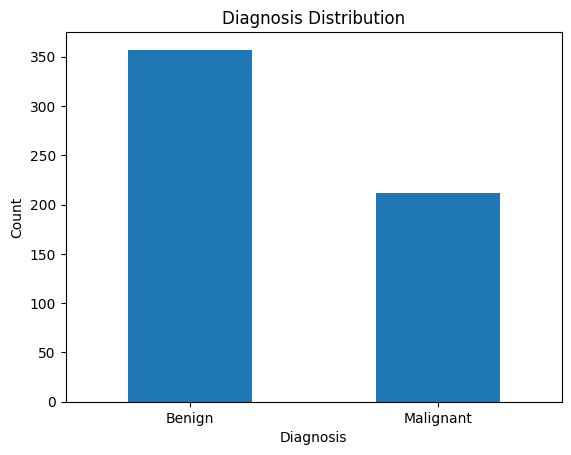

In [32]:
plot_diagnosis = dfclean['diagnosis'].value_counts().plot(kind='bar', title='Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'], rotation=0)
plt.show()

Proprotion de Benin et Malignant

In [64]:
dfclean.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


En vrai trop de données à analyser donc on prend tout pour le ML


Data Preprocessing, Building Models and Evaluation :

    counts of unique rows in the ‘diagnosis’ column
    map categorical values to numerical values
    Splitting the data into train and test
    Implement logistic regression and print the accuracy.
    Implement K Nearest Neighbours and print the accuracy.
    Implement Random Forests and print the accuracy.
    Implement Support Vector Machines (SVM) and print the accuracy.
    Which is the best model ?

In [33]:
count_unique_rows_diagnosis = dfclean['diagnosis'].nunique()
print(f"Number of unique rows in 'diagnosis': {count_unique_rows_diagnosis}")   

Number of unique rows in 'diagnosis': 2


In [34]:
dfclean_M = dfclean[dfclean['diagnosis'] == 1]
dfclean_B = dfclean[dfclean['diagnosis'] == 0]  

In [35]:
len_M = len(dfclean_M)
len_B = len(dfclean_B)
print(f"Number of rows with diagnosis 'M': {len_M}")
print(f"Number of rows with diagnosis 'B': {len_B}")

Number of rows with diagnosis 'M': 212
Number of rows with diagnosis 'B': 357


LogisticRegression Accuracy: 0.96
              precision    recall  f1-score   support

           B       0.93      1.00      0.97        69
           M       1.00      0.89      0.94        45

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



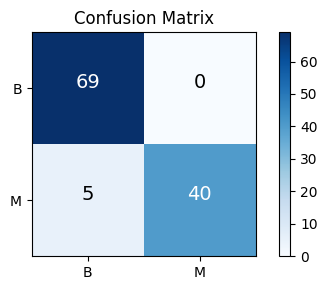

KNeighborsClassifier Accuracy: 0.93
              precision    recall  f1-score   support

           B       0.91      0.99      0.94        69
           M       0.97      0.84      0.90        45

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



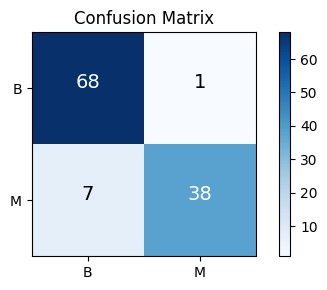

DecisionTreeClassifier Accuracy: 0.91
              precision    recall  f1-score   support

           B       0.92      0.94      0.93        69
           M       0.91      0.87      0.89        45

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



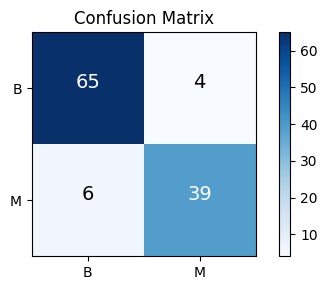

RandomForestClassifier Accuracy: 0.96
              precision    recall  f1-score   support

           B       0.96      0.97      0.96        69
           M       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



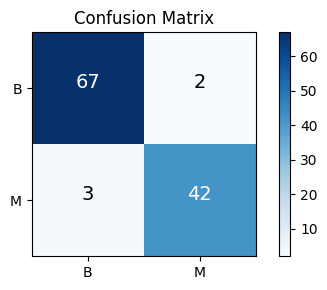

SVC Accuracy: 0.89
              precision    recall  f1-score   support

           B       0.86      0.99      0.92        69
           M       0.97      0.76      0.85        45

    accuracy                           0.89       114
   macro avg       0.92      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



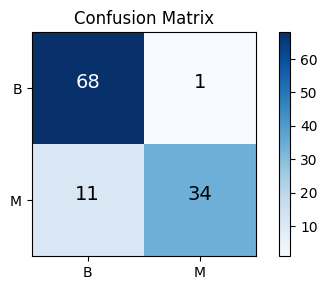

In [95]:
X = dfclean.drop('diagnosis', axis=1)
y = dfclean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27) 
for model in [LogisticRegression(max_iter=5000), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    plt.figure(figsize=(5, 3))
    matrix_confusion = confusion_matrix(y_test, y_pred)
    plt.imshow(matrix_confusion, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(le.classes_))
    plt.xticks(tick_marks, le.classes_)
    plt.yticks(tick_marks, le.classes_)
    
    # Affichage des nombres dans les cases avec couleur adaptée
    thresh = matrix_confusion.max() / 2
    for i in range(matrix_confusion.shape[0]):
        for j in range(matrix_confusion.shape[1]):
            plt.text(j, i, matrix_confusion[i, j],
                    horizontalalignment='center',
                    color='white' if matrix_confusion[i, j] > thresh else 'black',
                    fontsize=14)

    plt.tight_layout()
    plt.show()



J'observe que le Confusion Matrix est un peu moins performant

Logistic Regression Accuracy: 0.96
K-Nearest Neighbors Accuracy: 0.93
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.96
Support Vector Machine Accuracy: 0.89
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           B       0.93      1.00      0.97        69
           M       1.00      0.89      0.94        45

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           B       0.91      0.99      0.94        69
           M       0.97      0.84      0.90        45

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114


Decision Tree Classification Report:
              precision    recall  f1-score   support



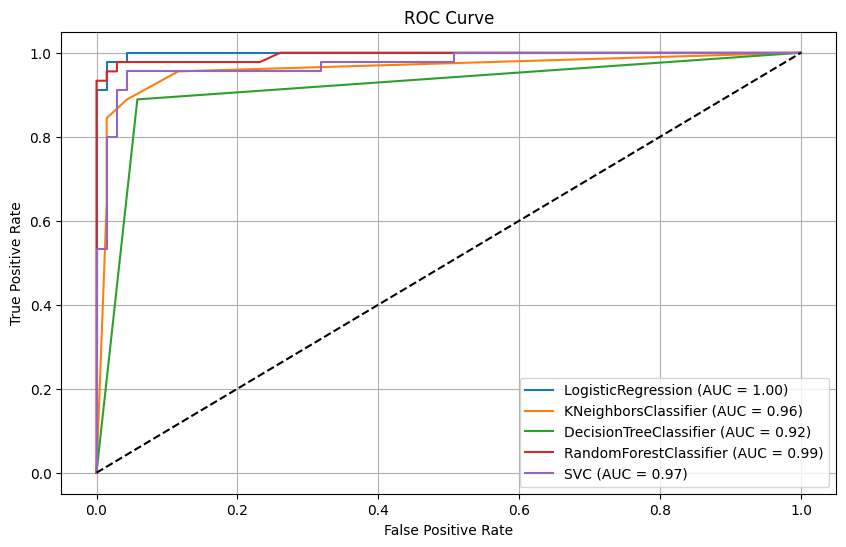

In [ ]:

print_oac = {
    'Logistic Regression': accuracy_score(y_test, LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)),
    'K-Nearest Neighbors': accuracy_score(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test)),        
    'Decision Tree': accuracy_score(y_test, DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)),
    'Random Forest': accuracy_score(y_test, RandomForestClassifier().fit(X_train, y_train).predict(X_test)),
    'Support Vector Machine': accuracy_score(y_test, SVC(probability=True).fit(X_train, y_train).predict(X_test))
}

for model_name, accuracy in print_oac.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

print_classification_report = {
    'Logistic Regression': classification_report(y_test, LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test), target_names=le.classes_),
    'K-Nearest Neighbors': classification_report(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test), target_names=le.classes_),
    'Decision Tree': classification_report(y_test, DecisionTreeClassifier().fit(X_train, y_train).predict(X_test), target_names=le.classes_),
    'Random Forest': classification_report(y_test, RandomForestClassifier().fit(X_train, y_train).predict(X_test), target_names=le.classes_),
    'Support Vector Machine': classification_report(y_test, SVC(probability=True).fit(X_train, y_train).predict(X_test), target_names=le.classes_)
}

for model_name, report in print_classification_report.items():
    print(f"{model_name} Classification Report:\n{report}\n")

plt.figure(figsize=(10, 6))

for model in [LogisticRegression(max_iter=5000), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(probability=True)]:
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.show()  

Le DecisionTreeClassifier est moins performant que les autres ML mois au vue des résultats j'ai l'impression que les précision sont trop grosses pour être valable (overfitted??)


- **Précisions de chaque modèle :**
    - Logistic Regression Accuracy: 0.96
    - K-Nearest Neighbors Accuracy: 0.93
    - Decision Tree Accuracy: 0.91
    - Random Forest Accuracy: 0.96
    - Support Vector Machine Accuracy: 0.89

- **Meilleur modèle selon l'accuracy :**
    - Le modèle ayant la meilleure précision est : **Random Forest** (0.96)

- **Observation générale :**
    - Tous les modèles testés présentent de bonnes performances (accuracy > 0.89).
    - Le Random Forest obtient la meilleure précision, suivi de la régression logistique.
    - Le SVM a une précision légèrement inférieure, mais reste performant.
    - Les rapports de classification montrent également un bon équilibre entre précision et rappel pour chaque classe.
    - Globalement, les modèles sont efficaces pour distinguer les diagnostics bénins et malins sur ce jeu de données.

In [88]:
cross_val_scores = {
    'Logistic Regression': cross_val_score(LogisticRegression(max_iter=5000), X, y, cv=5),
    'K-Nearest Neighbors': cross_val_score(KNeighborsClassifier(), X, y, cv=5),
    'Decision Tree': cross_val_score(DecisionTreeClassifier(), X, y, cv=5),
    'Random Forest': cross_val_score(RandomForestClassifier(), X, y, cv=5),
    'Support Vector Machine': cross_val_score(SVC(probability=True), X, y, cv=5)
}
for model_name, scores in cross_val_scores.items():
    print(f"{model_name} Cross-Validation Scores: {scores}")
    print(f"Mean Score: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}\n") 




Logistic Regression Cross-Validation Scores: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Mean Score: 0.95, Standard Deviation: 0.02

K-Nearest Neighbors Cross-Validation Scores: [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]
Mean Score: 0.93, Standard Deviation: 0.02

Decision Tree Cross-Validation Scores: [0.9122807  0.9122807  0.9122807  0.94736842 0.91150442]
Mean Score: 0.92, Standard Deviation: 0.01

Random Forest Cross-Validation Scores: [0.95614035 0.94736842 0.98245614 0.98245614 0.97345133]
Mean Score: 0.97, Standard Deviation: 0.01

Support Vector Machine Cross-Validation Scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean Score: 0.91, Standard Deviation: 0.04



Random Forest est le meilleur modèle avec une moyenne d’accuracy de 0.97 et une faible variance (std 0.01).
Logistic Regression arrive juste derrière avec 0.95 de moyenne.
K-Nearest Neighbors et Decision Tree sont proches, autour de 0.92-0.93.
Support Vector Machine est le moins performant ici (0.91), avec une variance un peu plus élevée.
Conclusion :

Le modèle Random Forest est le plus robuste et performant sur ce jeu de données.
Tous les modèles ont une bonne stabilité (faible écart-type), sauf SVM qui varie un peu plus.
Tu peux donc privilégier Random Forest pour la suite de ton analyse ou pour une mise en production.